# Exponential growth model example

Discrete time model

$N_{t+1} = N_t + R N_t$

Continuous time model

$\frac{dN}{dt} = r N$

The two models give similar results when $R = e^r - 1$

In [53]:
from scipy.integrate import solve_ivp
import numpy as np
from tools import iterate
import ipywidgets as ipy
import matplotlib.pylab as plt

In [54]:
# Define model

def exp_discrete(n, R):
    return n + R * n

def exp_continuous(t, n, r):
    return r * n

In [55]:
init = 0.2 #initial population density
time_series = np.linspace(0, 100, 100)
r = 0.1
R = 0.1 # Lets try the value R = e^r - 1 
# simulation for continuous time model
pop_continuous = solve_ivp(exp_continuous, [0, 100], [init], 
                           t_eval=time_series, args=(r,))

# simulation for discrete time model
t_discrete, pop_discrete = iterate(exp_discrete, init, time_series[-1], R)

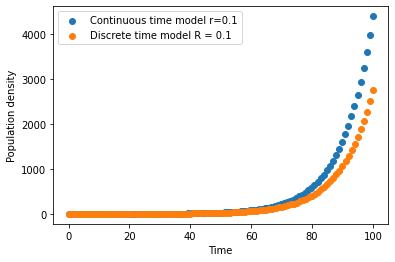

In [56]:
plt.scatter(pop_continuous.t, pop_continuous.y, label='Continuous time model r=0.1')
plt.scatter(t_discrete, pop_discrete, label='Discrete time model R = 0.1')
plt.xlabel('Time')
plt.ylabel('Population density')
plt.legend()


# Interactive graph

In [61]:
# Code to produce interactive figures
time_series = np.linspace(0, 100, 100)

# Create function for interactive plot
def plot_interactive(R_val, r_val):
    pc = solve_ivp(exp_continuous, [0, 100], [0.2], 
                t_eval=time_series, args=(r_val,))
    td, pd = iterate(exp_discrete, 0.2, time_series[-1], R_val)
    plt.scatter(pc.t, pc.y, label=f'r = {r_val}')
    plt.scatter(td, pd, label=f'R = {R_val}, \n e^r - 1 = {np.exp(r_val) - 1}')
    plt.legend(loc='upper left')
    plt.xlabel('Time')
    plt.ylabel('Population density')

In [62]:
ipy.interact(plot_interactive, R_val=(0.001, 0.1, 1e-4), r_val=(0.001, 0.1, 1e-4))

interactive(children=(FloatSlider(value=0.0505, description='R_val', max=0.1, min=0.001, step=0.0001), FloatSl…

<function __main__.plot_interactive(R_val, r_val)>